In [2]:
import joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,precision_score,roc_curve
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

**Read and shuffle the dataset**

In [4]:
#Read and output dataset
data = pd.read_csv('/kaggle/input/second-dataset-and-symptoms/symbipredict_2022.csv')
data = shuffle(data,random_state=42)
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypoglycemia
393,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
1164,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Osteoarthritis
4478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma
731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hyperthyroidism


In [5]:
#Dataset Description
print(data.describe())

           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4961.000000  4961.000000           4961.000000          4961.000000   
mean      0.137875     0.159847              0.021971             0.045152   
std       0.344804     0.366501              0.146605             0.207659   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4961.000000  4961.000000  4961.000000   4961.000000  4961.000000   
mean      0.021971     0.162266     0.139085      0.045152     0.045152   
std       0.146605     0.368732     0.346070      0.207659     0.207659 

In [6]:
#Total null values found
print(data.isnull().sum())

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


In [7]:
print(data.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


In [8]:
data.columns = data.columns.str.strip('_')

In [9]:
print(data.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


In [10]:
# Check the distribution of the target variable (Disease)
print(data['prognosis'].value_counts())

prognosis
Hypoglycemia                     121
Gastroenteritis                  121
Heart Attack                     121
Alcoholic Hepatitis              121
Hepatitis A                      121
Vertigo                          121
Peptic Ulcer Disease             121
Drug Reaction                    121
Paralysis (brain hemorrhage)     121
Fungal Infection                 121
Varicose Veins                   121
Impetigo                         121
Hepatitis B                      121
Tuberculosis                     121
Dimorphic Hemmorhoids (piles)    121
Allergy                          121
Pneumonia                        121
Migraine                         121
Cervical Spondylosis             121
Arthritis                        121
Hepatitis C                      121
Psoriasis                        121
GERD                             121
Osteoarthritis                   121
Bronchial Asthma                 121
Hyperthyroidism                  121
Chronic Cholestasis         

In [11]:
#Read And Print Symptom Dataset

data2 = pd.read_csv('/kaggle/input/disease-symptom-description-dataset/Symptom-severity.csv')
data2['Symptom'] = data2['Symptom'].str.replace('_',' ')
data2.head()

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


In [12]:
data2['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [13]:
cols = data.columns
# Flatten the DataFrame to a 1D array
data_flat = data.values.flatten()

# Create a Series and strip whitespace (only apply to string elements)
s = pd.Series(data_flat)
s = s.apply(lambda x: x.strip() if isinstance(x, str) else x)

# Check if the original and cleaned arrays match in length
if s.size == data.size:
    # Reshape the cleaned data back to the original shape
    s_reshaped = s.values.reshape(data.shape)
    
    # Create a new DataFrame with the original column names
    data_cleaned = pd.DataFrame(s_reshaped, columns=cols)
    
    # Display the cleaned DataFrame
    data_cleaned.head()
else:
    print("Mismatch in the number of elements between original and cleaned data.")


**Handling Missing Values**

In [14]:
# Handle any missing values if present (example: fill with mode)
data = data.fillna(0)
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypoglycemia
393,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
1164,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Osteoarthritis
4478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma
731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hyperthyroidism


In [15]:
# Standardize the symptoms and values for matching
vals = np.char.lower(np.char.strip(data.values.astype(str)))  # Convert to lowercase and strip spaces
symptoms = [sym.lower().strip() for sym in data2['Symptom'].unique()]

# Replace the values in the array with the corresponding weights
for i in range(len(symptoms)):
    mask = vals == symptoms[i]  # Find matches for the current symptom
    if mask.any():  # Check if there are any matches
        vals[mask] = data2.loc[data2['Symptom'].str.lower().str.strip() == symptoms[i], 'weight'].values[0]

# Create the cleaned DataFrame
d = pd.DataFrame(vals, columns=cols)
d.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,hypoglycemia
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,psoriasis
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,osteoarthritis
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,bronchial asthma
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,hyperthyroidism


In [16]:
d = d.replace('dischromic  patches', 0)
d = d.replace('spotting  urination',0)
data = d.replace('foul smell of urine',0)
data.head(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,hypoglycemia
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,psoriasis
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,osteoarthritis
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,bronchial asthma
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,hyperthyroidism
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,chronic cholestasis
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,hepatitis d
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,hyperthyroidism
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,malaria
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,aids


In [17]:
null_checker = data.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

                      count
itching                   0
skin_rash                 0
nodal_skin_eruptions      0
continuous_sneezing       0
shivering                 0
...                     ...
inflammatory_nails        0
blister                   0
red_sore_around_nose      0
yellow_crust_ooze         0
prognosis                 0

[133 rows x 1 columns]


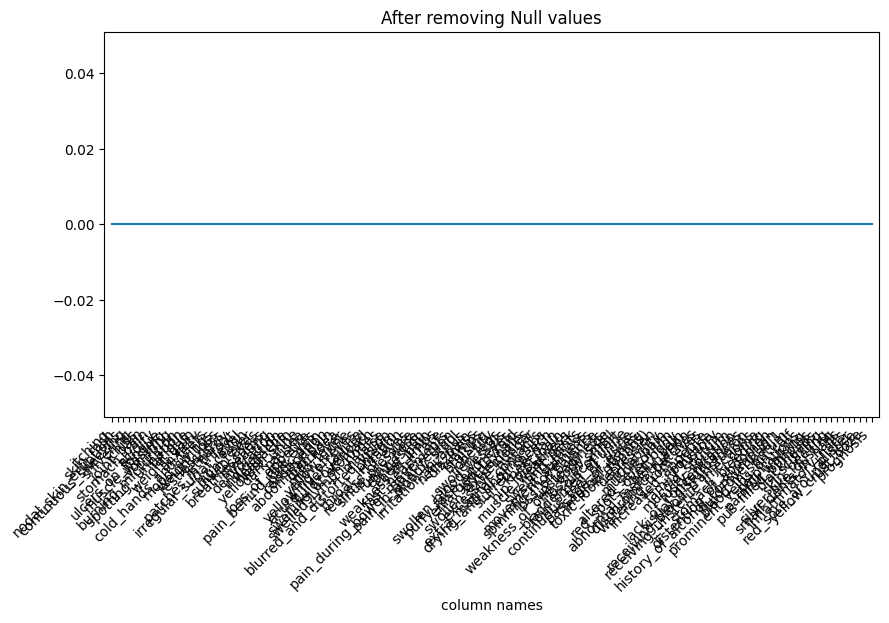

In [18]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('After removing Null values')
plt.xlabel('column names')
plt.margins(0.01)
plt.show()

**Model Training**

In [19]:
print("Number of symptoms used to identify the disease ",len(data2['Symptom'].unique()))
print("Number of diseases that can be identified ",len(data['prognosis'].unique()))

Number of symptoms used to identify the disease  132
Number of diseases that can be identified  41


In [20]:
data['prognosis'].unique()

array(['hypoglycemia', 'psoriasis', 'osteoarthritis', 'bronchial asthma',
       'hyperthyroidism', 'chronic cholestasis', 'hepatitis d', 'malaria',
       'aids', 'dengue', 'acne', 'hypertension',
       'urinary tract infection', 'diabetes', 'typhoid', 'jaundice',
       'hepatitis e', 'chickenpox', 'hypothyroidism', 'gerd',
       'hepatitis c', 'gastroenteritis', 'arthritis', 'heart attack',
       'alcoholic hepatitis', 'hepatitis a', 'vertigo',
       'peptic ulcer disease', 'drug reaction',
       'paralysis (brain hemorrhage)', 'fungal infection',
       'varicose veins', 'impetigo', 'hepatitis b', 'tuberculosis',
       'dimorphic hemmorhoids (piles)', 'allergy', 'pneumonia',
       'migraine', 'cervical spondylosis', 'common cold'], dtype=object)

In [21]:
# Extract the 'Disease' column as labels before converting to NumPy array
labels = data['prognosis'].values

# Convert the features to a NumPy array, excluding the 'Disease' column
features = data.iloc[:, 1:].values


In [22]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3968, 133) (993, 133) (3968,) (993,)


**Logistic Regression Model**

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


itching                  1
skin_rash                0
nodal_skin_eruptions     0
continuous_sneezing      0
shivering                0
                        ..
inflammatory_nails       0
blister                  0
red_sore_around_nose     0
yellow_crust_ooze        0
prognosis               19
Name: 4379, Length: 133, dtype: int64
hepatitis b
F1-score% = 100.0
Accuracy% = 100.0
                               precision    recall  f1-score   support

                         acne       1.00      1.00      1.00        24
                         aids       1.00      1.00      1.00        28
          alcoholic hepatitis       1.00      1.00      1.00        32
                      allergy       1.00      1.00      1.00        18
                    arthritis       1.00      1.00      1.00        16
             bronchial asthma       1.00      1.00      1.00        25
         cervical spondylosis       1.00      1.00      1.00        24
                   chickenpox       1.00      1.

<Axes: >

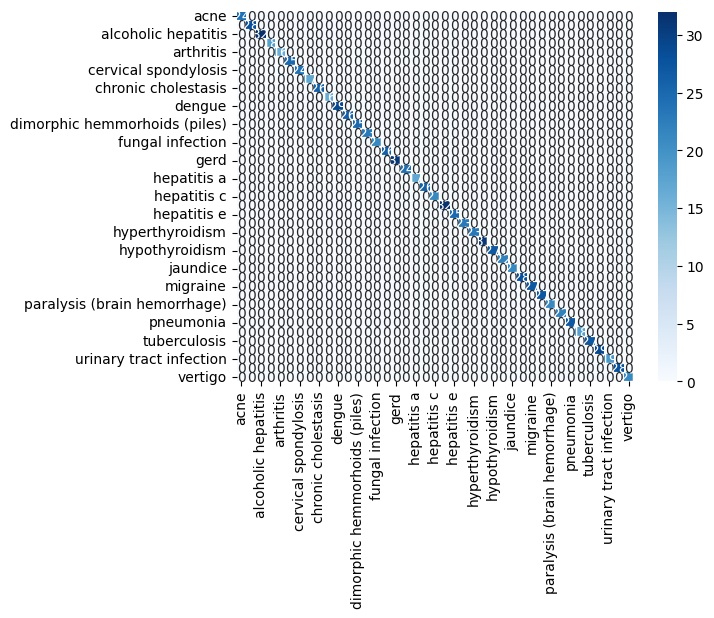

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
import seaborn as sns
import pandas as pd
import numpy as np

# Step 1: Ensure consistent data types for training and testing
# If not done previously, convert categorical columns to strings
categorical_columns = x_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    x_train[col] = x_train[col].astype(str)
    x_test[col] = x_test[col].astype(str)

# Step 2: Apply Label Encoding to convert categorical data into numerical form
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])
    label_encoders[col] = le  # Store encoders for potential future use

# Step 3: Ensure all columns are numerical (optional but recommended)
x_train = x_train.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
x_test = x_test.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Step 4: Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=2000, random_state=42)
log_reg.fit(x_train, y_train)

# Step 5: Make predictions
preds = log_reg.predict(x_test)

# Step 6: Print predictions for the first instance for inspection
print(x_test.iloc[0])
print(preds[0])

# Step 7: Evaluate the model
conf_mat = confusion_matrix(y_test, preds)
unique_labels = np.unique(y_test)
df_cm = pd.DataFrame(conf_mat, index=unique_labels, columns=unique_labels)

# Print F1-score, accuracy, and classification report
print('F1-score% =', f1_score(y_test, preds, average='macro') * 100)
print('Accuracy% =', accuracy_score(y_test, preds) * 100)
print(classification_report(y_test, preds))

# Plot the confusion matrix
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')

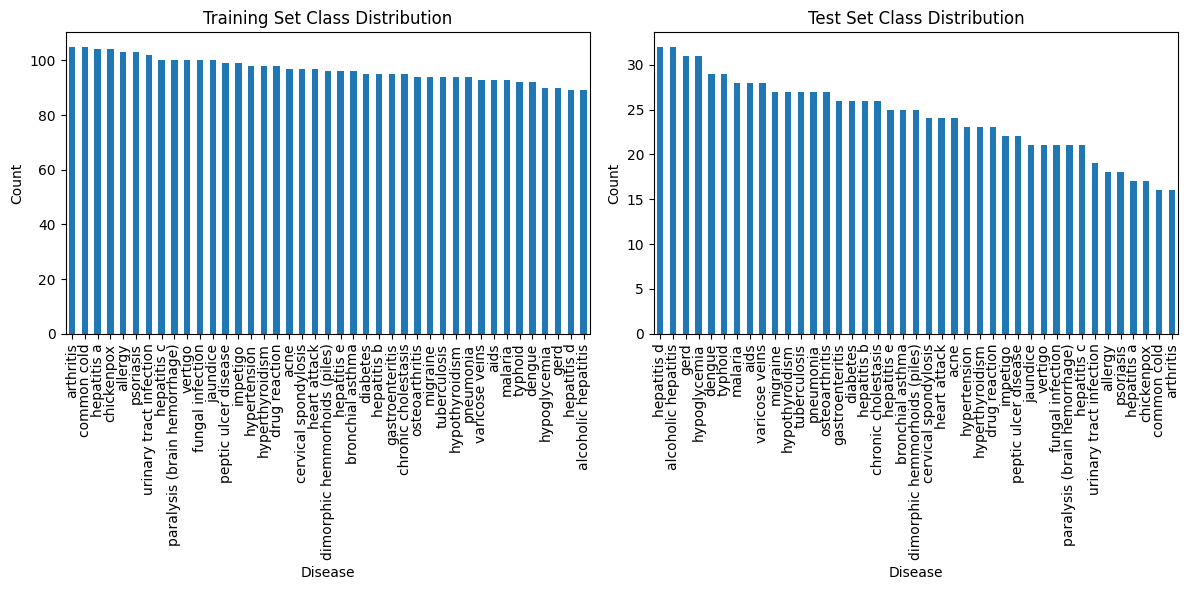

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert y_train and y_test to Pandas Series
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

# Plot class distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Training set distribution
y_train_series.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Training Set Class Distribution')
axes[0].set_xlabel('Disease')
axes[0].set_ylabel('Count')

# Test set distribution
y_test_series.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Test Set Class Distribution')
axes[1].set_xlabel('Disease')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Optimization algorithms
    'max_iter': [500, 700, 1000]  # Maximum iterations
}

# Initialize the model
log_reg = LogisticRegression(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit to the training data
grid_search.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy: %.2f%%" % (grid_search.best_score_ * 100))


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters: {'C': 0.01, 'max_iter': 500, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 100.00%


In [26]:
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=2000, random_state=42)

# Define the K-Fold cross-validator
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation using Logistic Regression
DS_train = cross_val_score(log_reg, x_train, y_train, cv=kfold, scoring='accuracy')

# Create a DataFrame with the scores
scores_df = pd.DataFrame(DS_train, columns=['Scores'])
print(scores_df)

# Print the mean accuracy and standard deviation
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_train.mean() * 100.0, DS_train.std() * 100.0))


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

   Scores
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
Mean Accuracy: 100.000%, Standard Deviation: (0.00%)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Random Forest Tree Model**

itching                  1
skin_rash                0
nodal_skin_eruptions     0
continuous_sneezing      0
shivering                0
                        ..
inflammatory_nails       0
blister                  0
red_sore_around_nose     0
yellow_crust_ooze        0
prognosis               19
Name: 4379, Length: 133, dtype: int64
hepatitis b
F1-score% = 100.0 | Accuracy% = 100.0


<Axes: >

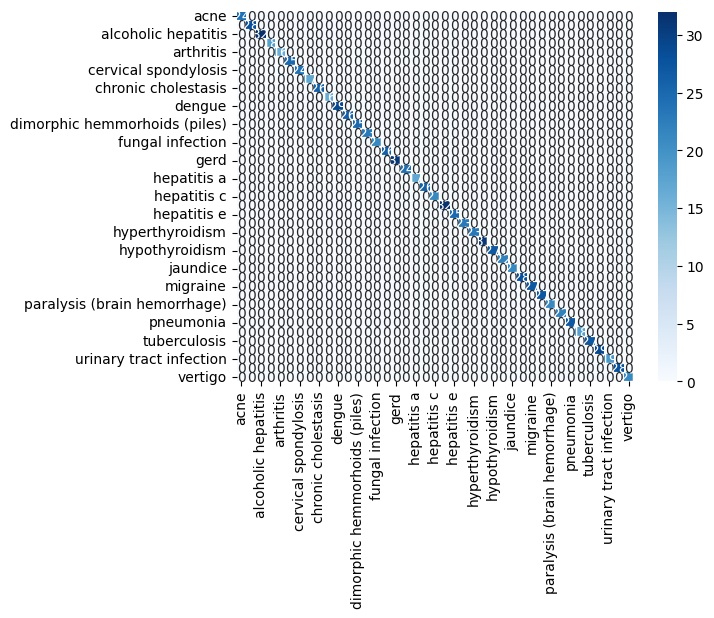

In [27]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import seaborn as sns
import pandas as pd

# Initialize and train the Random Forest model
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators=500, max_depth=13)
rnd_forest.fit(x_train, y_train)

# Make predictions
preds = rnd_forest.predict(x_test)

# Print the first row of x_test and the first prediction for inspection
print(x_test.iloc[0])  # Access the first row using iloc
print(preds[0])

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, preds)

# Get unique labels using np.unique since y_test is a NumPy array
unique_labels = np.unique(y_test)
df_cm = pd.DataFrame(conf_mat, index=unique_labels, columns=unique_labels)

# Print F1-score and accuracy
print('F1-score% =', f1_score(y_test, preds, average='macro') * 100, '| Accuracy% =', accuracy_score(y_test, preds) * 100)

# Plot the confusion matrix
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')


In [28]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rnd_forest = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rnd_forest, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit to the training data
grid_search.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy: %.2f%%" % (grid_search.best_score_ * 100))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 100.00%


In [29]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_train =cross_val_score(rnd_forest, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_train.mean()*100.0, rnd_forest_train.std()*100.0))

Mean Accuracy: 100.000%, Standard Deviation: (0.00%)


In [30]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_train =cross_val_score(rnd_forest, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_train.mean()*100.0, rnd_forest_train.std()*100.0))

Mean Accuracy: 100.000%, Standard Deviation: (0.00%)


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd

# Step 1: Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Ensure x_train is defined
x_test_scaled = scaler.transform(x_test)        # Ensure x_test is defined

# Step 2: Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators=500, max_depth=13)

# Step 3: KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Step 4: Cross-validation scores
log_reg_scores = cross_val_score(log_reg, x_train_scaled, y_train, cv=kfold, scoring='accuracy')
rnd_forest_scores = cross_val_score(rnd_forest, x_train_scaled, y_train, cv=kfold, scoring='accuracy')

# Step 5: Print mean accuracy and standard deviation
print("Logistic Regression - Mean Accuracy: %.3f%%, Std Dev: (%.2f%%)" % (log_reg_scores.mean() * 100, log_reg_scores.std() * 100))
print("Random Forest - Mean Accuracy: %.3f%%, Std Dev: (%.2f%%)" % (rnd_forest_scores.mean() * 100, rnd_forest_scores.std() * 100))

# Step 6: Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Mean Accuracy': [log_reg_scores.mean() * 100, rnd_forest_scores.mean() * 100],
    'Std Dev': [log_reg_scores.std() * 100, rnd_forest_scores.std() * 100]
})
print(comparison_df)


Logistic Regression - Mean Accuracy: 100.000%, Std Dev: (0.00%)
Random Forest - Mean Accuracy: 100.000%, Std Dev: (0.00%)
                 Model  Mean Accuracy  Std Dev
0  Logistic Regression          100.0      0.0
1        Random Forest          100.0      0.0


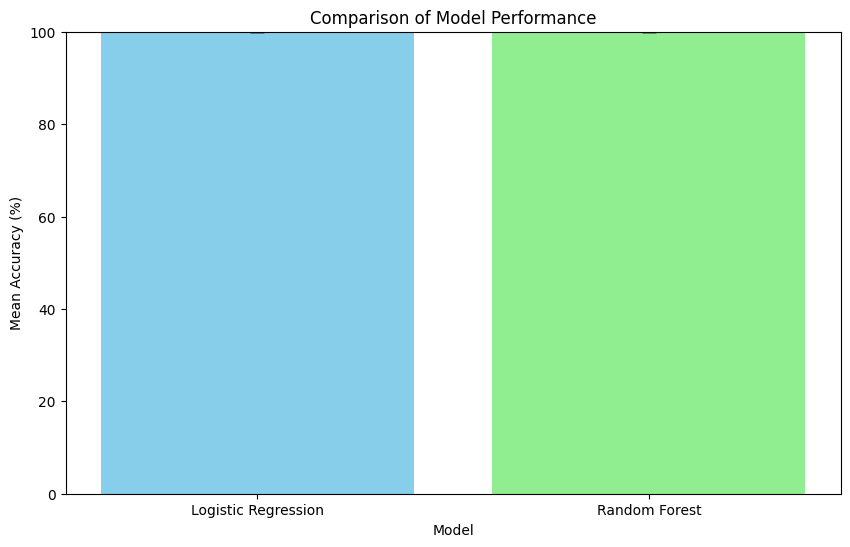

In [32]:
import matplotlib.pyplot as plt

# Create a DataFrame for comparison (if not already created)
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Mean Accuracy': [log_reg_scores.mean() * 100, rnd_forest_scores.mean() * 100],
    'Std Dev': [log_reg_scores.std() * 100, rnd_forest_scores.std() * 100]
})

# Plot a bar chart for Mean Accuracy with error bars for Std Dev
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['Mean Accuracy'], yerr=comparison_df['Std Dev'], 
        capsize=5, color=['skyblue', 'lightgreen'])
plt.title('Comparison of Model Performance')
plt.ylabel('Mean Accuracy (%)')
plt.xlabel('Model')
plt.ylim([0, 100])  # Set y-axis limit for better visualization

# Display the chart
plt.show()


**Saved Model (Logistic Regression Model)**

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from joblib import dump, load  # Ensuring this import is at the top of script

# Train a Random Forest model
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators=500, max_depth=13)
rnd_forest.fit(x_train, y_train)
dump(rnd_forest, 'random_forest_model.joblib')

# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=2000, random_state=42)
log_reg.fit(x_train_scaled, y_train)
dump(log_reg, '/kaggle/working/logistic_regression_model.joblib')

['logistic_regression_model.joblib']

In [34]:
# Load the training columns correctly
training_columns_df = pd.read_csv('/kaggle/input/second-dataset-and-symptoms/symbipredict_2022.csv', header=None)

# Ensuring that only the first column is used 
training_columns = training_columns_df.iloc[:, 0].tolist()  # Access the first column and convert to a list

# Print to verify that the training columns are loaded correctly
print(training_columns)


['itching', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'

/tmp/ipykernel_30/3644151757.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131) have mixed types. Specify dtype option on import or set low_memory=False.
  training_columns_df = pd.read_csv('/kaggle/input/second-dataset-and-symptoms/symbipredict_2022.csv', header=None)


**First Prediction Without Prompt from User At Random**

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from joblib import load  # For loading a saved model

# Load your trained model 
model = load('/kaggle/working/logistic_regression_model.joblib')  # Replace with your model filename

# Load or define the encoders used during training for consistent encoding
label_encoders = {} 

# Sample symptoms list to match training format
symptoms_list = data2['Symptom']  # Replace with actual columns/symptoms used during training

# Extract feature columns from the original training DataFrame used for training
training_columns = x_train.columns.tolist()  # Ensure `x_train` is the DataFrame used during model training

# Function to ensure user input matches the training features
def encode_user_input(input_symptoms, training_columns, label_encoders):
    user_data = {col: 0 for col in training_columns}  # Initialize with zeros for all features
    for symptom in input_symptoms:
        if symptom in user_data:
            user_data[symptom] = 1
    user_df = pd.DataFrame([user_data])
    
    # Apply LabelEncoder if needed
    for col in user_df.columns:
        if col in label_encoders:
            user_df[col] = label_encoders[col].transform(user_df[col])
    return user_df

def predict_disease(input_symptoms):
    # Encode the user input
    user_input_encoded = encode_user_input(input_symptoms, training_columns, label_encoders)

    # Ensuring columns match the training data
    user_input_encoded = user_input_encoded[training_columns]  # Reorder and align columns

    # Convert DataFrame to NumPy array to avoid feature name warnings
    user_input_array = user_input_encoded.values

    # Predict disease
    prediction = model.predict(user_input_array)
    return prediction[0]

# Example usage:
user_symptoms = data2['Symptom']  # Replace with actual user input
predicted_disease = predict_disease(user_symptoms)
print(f"Predicted Disease: {predicted_disease}")


Predicted Disease: malaria


In [36]:
# Retrain the model with feature names
log_reg = LogisticRegression(max_iter=2000, random_state=42)
log_reg.fit(x_train, y_train)  # Ensure x_train is a DataFrame


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000, random_state=42)

**User-Prompt**

In [37]:
# List of known symptoms from the training data
known_symptoms = set(training_columns)  # Ensure this matches your model's features

def validate_input(input_symptoms):
    invalid_symptoms = [symptom for symptom in input_symptoms if symptom not in known_symptoms]
    if invalid_symptoms:
        print(f"Warning: These symptoms are not recognized: {', '.join(invalid_symptoms)}")
        return False
    return True

# Modify the user input function
def get_user_input_and_predict():
    input_text = input("Please enter your symptoms, separated by commas: ")
    user_symptoms = [symptom.strip() for symptom in input_text.split(',')]
    
    if not validate_input(user_symptoms):
        print("Please enter valid symptoms.")
        return
    
    predicted_disease = predict_disease(user_symptoms)
    print(f"Predicted Disease: {predicted_disease}")

get_user_input_and_predict()


Please enter your symptoms, separated by commas:  itching


Predicted Disease: jaundice
